# **Tugas 2, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

## Soal
1. Membuat pemrograman radioactive decay dengan metode euler, metode heun, dan metode runge kutta orde 4

## Jawab

### Radioactive Decay
Rumus dasar peluruhan radioaktif ialah
$$ N_{(t)} = N_i e^{-\lambda t} $$
Dimana
 - $ N_{(t)} $ adalah jumlah inti radioaktif yang tersisa pada waktu t
- $ N_i $ adalah jumlah inti radioaktif awal (pada t = i)
- $ \lambda $ adalah konstanta peluruhan yang merupakan probabilitas bahwa satu inti akan meluruh per satuan waktu.
- $ t $ adalah waktu yang telah berlalu

In [24]:
import math
# Initial value
N = 1000
lam = 0.1
t = 5

# Function for radioactive decay
def radioactive(N, lam, t):
    Nt = N * math.exp(-lam*t)
    return Nt
print(radioactive(N, lam, t))

606.5306597126335


### Solusi Analitik

In [25]:
import numpy as np
# Constant for all analysis
time = np.linspace(0, 200, 100)
N = 1000
lam = 0.1

hasil = []
for i in range(len(time)):
    hasil.append(radioactive(N, lam, time[i]))
print(hasil)

[1000.0, 817.0784211407313, 667.6171462938303, 545.4955638202434, 445.71265402551757, 364.18219163361493, 297.56541014756533, 243.1342755094668, 198.65976995847072, 162.32061118184816, 132.62866870306303, 108.36802322189581, 88.54517331628878, 72.34835041290566, 59.114275927513305, 48.30099924173011, 39.465704199952505, 32.246575276904316, 26.347980814448725, 21.528366564116034, 17.590363761946847, 14.37270664990266, 11.74362845702135, 9.595465398126374, 7.84024771761162, 6.406097226458321, 5.234283807468586, 4.2768203492089265, 3.494497618434179, 2.8552785967502463, 2.332986527749613, 1.9062329486362517, 1.5575418079981487, 1.2726338013398069, 1.039841617089057, 0.8496321467275513, 0.694216092998558, 0.5672289891977487, 0.4634705669189492, 0.3786917990633349, 0.3094208972776129, 0.25282113821554025, 0.20657469644415616, 0.16878772681821688, 0.1379128093365617, 0.11268558050780067, 0.09207295620664051, 0.07523082568708149, 0.061469484273514195, 0.05022538915853798, 0.041038081674836996

### Metode Euler
Algoritma
1. Tebak nilai awal $N_i$
2. Tentukan jumlah time step yang digunakan
3. Terapkan persamaan berikut untuk mendapatkan nilai baru
$$ N_{i+1} = N_{i} - N_{i} \lambda h  $$

In [26]:
# Constant for all analysis
time = np.linspace(0, 200, 100)
N = 1000
lam = 0.1

def euler(N, lam, time):
    h = time[1] - time[0]
    hasil_euler = [N]
    list_t = [0]
    for i in range(1, len(time)):
        hasil = hasil_euler[i-1] - h *lam * hasil_euler[i-1]
        hasil_euler.append(hasil)
        list_t.append(list_t[-1] + h)  
    return(hasil_euler, list_t)

hasil_euler, list_t = euler(N, lam, time)

## Metode Heun
Algoritma
1. Tebak nilai awal $N_i$
2. Tentukan jumlah time step
3. Lakukan prediksi nilai awal dengan metode euler, dimana persamaannya
$$ N_{i+1} = N_{i} - h N_{i} \lambda $$
4. Lakukan koreksi nilai awal dengan menggunakan persamaan
$$ N_{i+1} = N_i - \frac{h}{2} \lambda [N_i+N_{i} - h N_{i}] $$

In [27]:
# Constant for all analysis
time = np.linspace(0, 200, 100)
N = 1000
lam = 0.1

def heun(N, lam, time):
    h = time[1] - time[0]
    hasil_heun = [N]
    for i in range(1, len(time)):
        eu, dr = euler(hasil_heun[i-1], lam, time)
        heun = hasil_heun[i-1] - (h/2)*lam* (hasil_heun[i-1] + eu[i-1])
        hasil_heun.append(heun)
    return hasil_heun
hasil_heun = heun(N, lam, time)

## Metode Runge Kutta Orde 4
Algoritma
1. Tebak nilai awal $ N_i$
2. Tentukan jumlah time step
3. Lakukan prediksi nilai dengan menggunakan persamaan
$$ k_1 = f(t_i, N_i) $$
$$ k_2 = f(t_i+\frac{1}{2}h, N_i+\frac{1}{2}k_1 h) $$
$$ k_3 = f(t_i+\frac{1}{2}h, N_i+\frac{1}{2}k_2 h) $$
$$ k_4 = f(t_i+\frac{1}{2}h, N_i+\frac{1}{2}k_3 h) $$
$$ k_4 = f(t_i +h, N_i+k_3 h) $$
$$ N_{i+1} = N_i +\frac{1}{6} (k_1 +2 k_2 + 2 k_3+ k_4)h $$

In [28]:
# Constant for all analysis
time = np.linspace(0, 200, 100)
N = 1000
lam = 0.1

def runge_kutta_4(N, lam, time):
    h = time[1] - time[0] 
    hasil_rk4 = [N] 
    for i in range(1, len(time)):
        t_i = time[i-1]
        N_i = hasil_rk4[i-1]
        k1 = -lam * N_i
        k2 = -lam * (N_i + 0.5 * h * k1)
        k3 = -lam * (N_i + 0.5 * h * k2)
        k4 = -lam * (N_i + h * k3)
        Ni = N_i + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        hasil_rk4.append(Ni)
    return hasil_rk4

hasil_rk = runge_kutta_4(N, lam, time)

## Plot Grafik

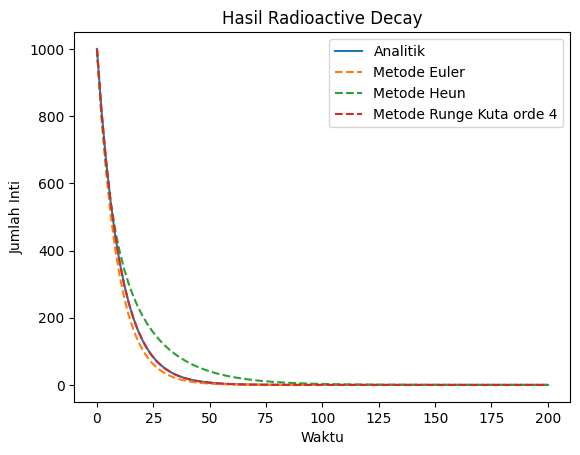

In [29]:
import matplotlib.pyplot as plt
plt.plot(time, hasil, label="Analitik")
plt.plot(list_t, hasil_euler, '--', label="Metode Euler")
plt.plot(list_t, hasil_heun, '--', label="Metode Heun")
plt.plot(list_t, hasil_rk, '--', label="Metode Runge Kuta orde 4")
plt.title("Hasil Radioactive Decay")
plt.xlabel("Waktu")
plt.ylabel("Jumlah Inti")
plt.legend()
plt.show()